In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Data

In [2]:
!wget 'https://raw.githubusercontent.com/ezzaddeentru/unicorn-companies/main/CB-Insights_Global-Unicorn-Club_2024.csv'

--2024-08-12 21:07:57--  https://raw.githubusercontent.com/ezzaddeentru/unicorn-companies/main/CB-Insights_Global-Unicorn-Club_2024.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215459 (210K) [text/plain]
Saving to: ‘CB-Insights_Global-Unicorn-Club_2024.csv’

CB-Insights_Global- 100%[===================>] 210.41K  --.-KB/s    in 0.04s   

2024-08-12 21:07:57 (5.78 MB/s) - ‘CB-Insights_Global-Unicorn-Club_2024.csv’ saved [215459/215459]



In [3]:
columns_to_read = ['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City', 'Industry', 'Select Investors']

# Read the CSV file with only the specified columns
df0 = pd.read_csv('CB-Insights_Global-Unicorn-Club_2024.csv', skiprows=3, usecols=columns_to_read)

# Drop rows with NaN values
df0 = df0.dropna(how='all')
df0

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225.00,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$150.00,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,OpenAI,$80.00,7/22/2019,United States,San Francisco,Enterprise Tech,Khosla Ventures
3,SHEIN,$66.00,7/3/2018,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,$65.00,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
...,...,...,...,...,...,...,...
1224,LinkSure Network,$1.00,1/1/2015,China,Shanghai,Industrials,NaN
1225,InMobi,$1.00,12/2/2014,India,Bengaluru,Enterprise Tech,"Kleiner Perkins Caufield & Byers, Softbank Cor..."
1226,TechStyle Fashion Group,$1.00,8/29/2014,United States,El Segundo,Consumer & Retail,"Matrix Partners, Passport Capital, Rho Ventures"
1227,Snapdeal,$1.00,5/21/2014,India,New Delhi,Consumer & Retail,"SoftBankGroup, Blackrock, Alibaba Group"


In [ ]:
column_descriptions = {
    'index': 'Row index of the dataset',
    'Company': 'Name of the unicorn company',
    'Valuation ($B)': 'Valuation of the company in billions of dollars',
    'Date Joined': 'Date when the company achieved unicorn status',
    'Country': 'Country where the company is headquartered',
    'City': 'City where the company\'s headquarters is located',
    'Industry': 'Industry in which the company operates',
    'Select Investors': 'Major investors in the company'
}

column_descriptions

{'index': 'Row index of the dataset',
 'Company': 'Name of the unicorn company',
 'Valuation ($B)': 'Valuation of the company in billions of dollars',
 'Date Joined': 'Date when the company achieved unicorn status',
 'Country': 'Country where the company is headquartered',
 'City': "City where the company's headquarters is located",
 'Industry': 'Industry in which the company operates',
 'Select Investors': 'Major investors in the company'}

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1229 non-null   object
 1   Valuation ($B)    1229 non-null   object
 2   Date Joined       1229 non-null   object
 3   Country           1227 non-null   object
 4   City              1209 non-null   object
 5   Industry          1229 non-null   object
 6   Select Investors  1220 non-null   object
dtypes: object(7)
memory usage: 109.1+ KB


Country, City, and Select Investors have some missing values

In [7]:
df0.shape

(1229, 7)

In [8]:
df0.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,1229,1229,1229,1227,1209,1229,1220
unique,1225,228,763,52,293,7,1200
top,Relativity,$1.00,7/13/2021,United States,San Francisco,Enterprise Tech,General Atlantic
freq,2,286,8,656,172,387,4


## Prepare data
We need to change data types for some columns and deal with missing data.

### Change columns data type

In [9]:
df1 = df0.copy()

In [10]:
# Convert 'Valuation ($B)' to numeric
df1['Valuation ($B)'] = df1['Valuation ($B)'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date Joined' to datetime
df1['Date Joined'] = pd.to_datetime(df1['Date Joined'], format='%m/%d/%Y')

In [11]:
df1.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,150.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,OpenAI,80.0,2019-07-22,United States,San Francisco,Enterprise Tech,Khosla Ventures
3,SHEIN,66.0,2018-07-03,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,65.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1229 non-null   object        
 1   Valuation ($B)    1229 non-null   float64       
 2   Date Joined       1229 non-null   datetime64[ns]
 3   Country           1227 non-null   object        
 4   City              1209 non-null   object        
 5   Industry          1229 non-null   object        
 6   Select Investors  1220 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 109.1+ KB


### Missing values
Country, city, Select Investor

In [13]:
df1.isnull().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,2
City,20
Industry,0
Select Investors,9


**Country missing values**

In [14]:
df1[df1['Country'].isnull()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
526,Quest Global,1.8,2023-08-08,NaN,Singapore,Industrials,NaN
548,Micro Connect,1.7,2023-08-02,NaN,Hong Kong,Financial Services,"HongShan, Horizons Ventures, Lenovo Capital an..."


Singapore and Hong Kong can be considered as a City and Country

In [15]:
# Fill NaN values in the 'Country' column based on the 'City' column
df1.loc[df1['City'] == 'Singapore', 'Country'] = df1.loc[df1['City'] == 'Singapore', 'Country'].fillna('Singapore')
df1.loc[df1['City'] == 'Hong Kong', 'Country'] = df1.loc[df1['City'] == 'Hong Kong', 'Country'].fillna('Hong Kong')

In [16]:
df1.loc[df1['City'] == 'Singapore']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
526,Quest Global,1.8,2023-08-08,Singapore,Singapore,Industrials,NaN


**City missing values**

In [17]:
df1[df1['City'].isnull()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
3,SHEIN,66.00,2018-07-03,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
244,HyalRoute,3.50,2020-05-26,Singapore,NaN,Industrials,Kuang-Chi
289,Amber Group,3.00,2021-06-21,Singapore,NaN,Financial Services,"Tiger Global Management, Tiger Brokers, DCM Ve..."
344,Moglix,2.60,2021-05-17,Singapore,NaN,Industrials,"Jungle Ventures, Accel, Venture Highway"
356,Coda Payments,2.50,2022-04-15,Singapore,NaN,Financial Services,"GIC. Apis Partners, Insight Partners"
452,Advance Intelligence Group,2.00,2021-09-23,Singapore,NaN,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
462,NIUM,2.00,2021-07-13,Singapore,NaN,Financial Services,"Vertex Ventures SE Asia, Global Founders Capit..."
489,Trax,2.00,2019-07-22,Singapore,NaN,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
528,Scroll,1.80,2023-03-14,Seychelles,NaN,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"
574,Kredivo Holdings,1.66,2022-08-15,Singapore,NaN,Financial Services,"Jungle Ventures, Square Peg Capital, OpenSpace..."


In [18]:
df1[df1['City'].isnull()]['Country'].value_counts()

,count
Country,
Singapore,16
Hong Kong,3
Seychelles,1


For Seychelles, we will fill the city with the capital city of Seychelles; Victoria

In [19]:
df1.loc[df1['Country'] == 'Seychelles', 'City']

,City
40,Victoria
528,NaN


In [20]:
# Fill NaN values in the 'City' column
df1.loc[df1['Country'] == 'Singapore', 'City'] = df1.loc[df1['Country'] == 'Singapore', 'City'].fillna('Singapore')
df1.loc[df1['Country'] == 'Hong Kong', 'City'] = df1.loc[df1['Country'] == 'Hong Kong', 'City'].fillna('Hong Kong')
df1.loc[df1['Country'] == 'Seychelles', 'City'] = df1.loc[df1['Country'] == 'Seychelles', 'City'].fillna('Victoria')

In [21]:
df1.loc[df1['Country'] == 'Seychelles']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
40,KuCoin,10.0,2022-05-10,Seychelles,Victoria,Financial Services,"IDG Capital, Matrix Partners China, Jump Crypto"
528,Scroll,1.8,2023-03-14,Seychelles,Victoria,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"


**Select Investors missing values**

Since the missing values in the "Select Investors" column are just a few data points, keeping them as NaNs (missing values) will not significantly impact the overall analysis.

In [22]:
df1[df1['Select Investors'].isnull()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
512,NinjaOne,1.90,2024-02-06,United States,Austin,Enterprise Tech,NaN
524,Helsing,1.82,2023-09-14,Germany,Munchen,Enterprise Tech,NaN
525,Astronergy,1.82,2023-07-25,China,Haining,Industrials,NaN
526,Quest Global,1.80,2023-08-08,Singapore,Singapore,Industrials,NaN
929,InCred,1.05,2023-11-09,India,Mumbai,Financial Services,NaN
957,01.AI,1.00,2023-11-05,China,Beijing,Enterprise Tech,NaN
964,Imbue,1.00,2023-09-07,United States,San Francisco,Enterprise Tech,NaN
972,Avenue One,1.00,2023-05-15,United States,New York,Financial Services,NaN
1224,LinkSure Network,1.00,2015-01-01,China,Shanghai,Industrials,NaN


In [23]:
df1.isnull().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Investors,9


Okay, good we don't have any missing values beside Select Investors

In [24]:
df0.isnull().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,2
City,20
Industry,0
Select Investors,9


### Splitting Select Investors

In [25]:
df_split = df1.copy()

In [26]:
# Split the 'Select Investors' column by commas and expand into separate columns
investors_split = df_split['Select Investors'].str.split(', ', expand=True)

# Concatenate the original dataframe with the split columns
df_split = pd.concat([df_split, investors_split], axis=1)

# Rename the new columns
new_column_names = [f"Investor_{i+1}" for i in range(investors_split.shape[1])]
df_split.columns = list(df_split.columns[:-investors_split.shape[1]]) + new_column_names

df_split.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,SoftBank Group
1,SpaceX,150.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,OpenAI,80.0,2019-07-22,United States,San Francisco,Enterprise Tech,Khosla Ventures,Khosla Ventures,None,None,None
3,SHEIN,66.0,2018-07-03,Singapore,Singapore,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
4,Stripe,65.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None


# EDA

In [28]:
original_df = df0.copy()
validated_df = df1.copy()

In [27]:
df = df_split.copy()
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,SoftBank Group
1,SpaceX,150.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,OpenAI,80.0,2019-07-22,United States,San Francisco,Enterprise Tech,Khosla Ventures,Khosla Ventures,None,None,None
3,SHEIN,66.0,2018-07-03,Singapore,Singapore,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
4,Stripe,65.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1229 non-null   object        
 1   Valuation ($B)    1229 non-null   float64       
 2   Date Joined       1229 non-null   datetime64[ns]
 3   Country           1229 non-null   object        
 4   City              1229 non-null   object        
 5   Industry          1229 non-null   object        
 6   Select Investors  1220 non-null   object        
 7   Investor_1        1220 non-null   object        
 8   Investor_2        1148 non-null   object        
 9   Investor_3        1048 non-null   object        
 10  Investor_4        7 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 147.5+ KB


In [29]:
df.describe()

,Valuation ($B),Date Joined
count,1229.000000,1229
mean,3.129463,2020-11-28 23:24:50.968267008
min,1.000000,2007-07-02 00:00:00
25%,1.080000,2020-04-01 00:00:00
50%,1.500000,2021-06-23 00:00:00
75%,3.000000,2022-01-25 00:00:00
max,225.000000,2024-03-14 00:00:00
std,8.885661,NaN


In [ ]:
df.describe(include='object')

,Company,Country,City,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
count,1229,1229,1229,1229,1220,1220,1148,1048,7
unique,1225,52,293,7,1200,627,668,635,7
top,Relativity,United States,San Francisco,Enterprise Tech,General Atlantic,Andreessen Horowitz,Tiger Global Management,Tiger Global Management,SoftBank Group
freq,2,656,172,387,4,38,21,20,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
company_counts = df['Company'].value_counts()
company_counts[company_counts > 1]

Company
Relativity    2
Bolt          2
Fabric        2
Branch        2
Name: count, dtype: int64

In [ ]:
# Calculate company counts
company_counts = df['Company'].value_counts()

# Filter companies with count > 1
companies_with_multiple_entries = company_counts[company_counts > 1].index.tolist()

# Filter original dataframe based on companies with multiple entries
mutliple_companies_df = df[df['Company'].isin(companies_with_multiple_entries)]
mutliple_companies_df.sort_values(by='Company')

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
37,Bolt,11.00,2021-10-08,United States,San Francisco,Financial Services,"Activant Capital, Tribe Capital, General Atlantic",Activant Capital,Tribe Capital,General Atlantic,None
66,Bolt,8.40,2018-05-29,Estonia,Tallinn,Industrials,"Didi Chuxing, Diamler, TMT Investments",Didi Chuxing,Diamler,TMT Investments,None
203,Branch,4.00,2018-09-10,United States,Redwood City,Enterprise Tech,"New Enterprise Associates, Pear, Cowboy Ventures",New Enterprise Associates,Pear,Cowboy Ventures,None
932,Branch,1.05,2022-03-01,United States,Columbus,Insurance,"American Family Ventures, Greycroft, SignalFire",American Family Ventures,Greycroft,SignalFire,None
629,Fabric,1.50,2022-02-24,United States,Bellevue,Consumer & Retail,"Redpoint Ventures, Norwest Venture Partners, S...",Redpoint Ventures,Norwest Venture Partners,Sierra Ventures,None
1075,Fabric,1.00,2021-10-26,United States,New York,Consumer & Retail,"Innovation Endeavors, Aleph, Temasek",Innovation Endeavors,Aleph,Temasek,None
177,Relativity,4.20,2020-11-23,United States,Inglewood,Industrials,"Playground Global, Bond, Tribe Capital",Playground Global,Bond,Tribe Capital,None
228,Relativity,3.60,2021-03-18,United States,Chicago,Enterprise Tech,"Silver Lake, ICONIQ Capital",Silver Lake,ICONIQ Capital,None,None


# Investors

In [30]:
# Identify all columns that contain investor information
investor_columns = df.columns[-investors_split.shape[1]:]
investor_columns

Index(['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4'], dtype='object')

In [31]:


# Create an empty list to store all unique investors
all_investors = []
all_investors_combined = []

# Iterate over each row and each column to collect all unique investors
for col in investor_columns:
    all_investors.extend(df[col].dropna().unique())
    all_investors_combined.extend(df[col].dropna())

# Convert to a set to get unique investors
unique_investors = set(all_investors)

print(f"# Unique Investors:{len(unique_investors)}")

# Unique Investors:1414


In [ ]:
print(unique_investors)

{'China Culture Industrial Investment Fund', 'Pitango Venture Capital', 'Morningside Ventures', 'Nyca Partners', 'Gaingels', 'Four Rivers Group', 'Guangzhou Huiyin Aofeng Equity Investment Fund', 'Norwest Venture Partners', 'Flare Capital Partners', 'YL Ventures', 'F-Prime Capital', 'Crosslink Capital', 'Tiger Global', 'Multicoin Capital', 'Epiq Capital', 'Shima Capital', 'Hambro Perks', 'Builders VC', 'GMO VenturePartners', 'Greyhound Capital', 'Francisco Partners', 'Data Collective', 'Lux Capital', 'BDC Venture Capital', 'ZhenFund', 'TDR Capital', 'Rembrandt Venture Partners', 'Metaplanet', 'Ant Financial Services Group', 'Baseline Ventures', 'Revaia', 'Rethink Impact', 'AF Ventures', 'Refactor Capital', 'Wonder Ventures', 'IDG Capital', 'Cool Japan Fund', 'VGames', 'Apollo Projects', 'AU21', 'Balderton Capital', 'Hanaco Venture Capital', 'Connect Ventures', 'Marchmont Ventures', 'Polychain Capital', 'Bloomberg Beta', 'Expa', 'BNP Paribas', 'Ventura Capital', 'GIC', 'IndexVentures', 

In [32]:
# Convert to a pandas Series to use value_counts()
all_investors_df = pd.DataFrame({'Investor':all_investors_combined})

# Get value counts for each investor
all_investors_df_count = all_investors_df.value_counts().reset_index()
all_investors_df_count

,Investor,count
0,Andreessen Horowitz,67
1,Accel,63
2,Tiger Global Management,56
3,Sequoia Capital,52
4,Insight Partners,52
...,...,...
1409,Lemniscap VC,1
1410,Lenovo Capital and Incubator,1
1411,Lenovo Capital and Incubator Group,1
1412,Centralway,1


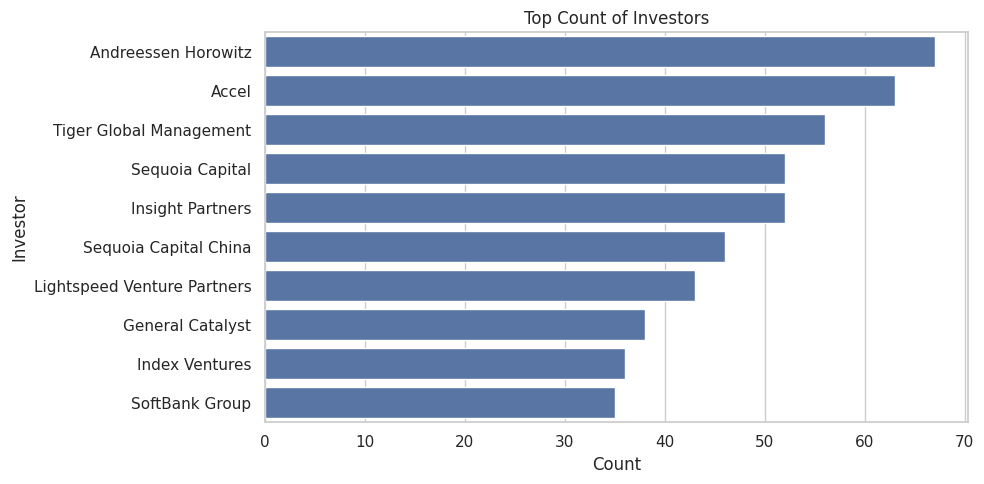

In [34]:
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y=all_investors_df_count[:10]['Investor'], x=all_investors_df_count[:10]['count'])
plt.xlabel('Count')
plt.ylabel('Investor')
plt.title('Top Count of Investors')
# plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

This indicates the level of activity of each investor in terms of the number of investments made. Investors with higher counts, such as Andreessen Horowitz and Accel, have invested in many of these unicorn companies compared to others on the list.

# Geographic Analysis

### By Country, City

In [63]:
# Aggregate number of companies by Country
country_counts = df.groupby('Country').size().reset_index(name='Number of Companies')

# Sort data by Number of Companies
country_counts = country_counts.sort_values(by='Number of Companies', ascending=False)

# Create a choropleth map for the number of companies by country
fig_country = px.choropleth(country_counts,
                            locations='Country',
                            locationmode='country names',
                            color='Number of Companies',
                            hover_name='Country',
                            hover_data={'Number of Companies': True, 'Country': False},
                            color_continuous_scale=px.colors.sequential.Plasma,
                            title='Global Distribution of Companies by Country')

# Customize the layout for better visualization
fig_country.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Number of Companies",
        tickvals=[min(country_counts['Number of Companies']), max(country_counts['Number of Companies'])],
        ticktext=["Fewer", "More"],
    )
)

fig_country.show()



In [68]:
import plotly.express as px

# 1. Aggregate number of companies by Country (already done in the previous step)
# country_counts = df.groupby('Country').size().reset_index(name='Number of Companies')

# 2. Filter for top N countries
top_n = 10
top_countries = country_counts.nlargest(top_n, 'Number of Companies')

# 3. Calculate percentage of total for each country
total_companies = country_counts['Number of Companies'].sum()
top_countries['Percentage of Total'] = (top_countries['Number of Companies'] / total_companies) * 100

# 4. Create a bar chart
fig_bar = px.bar(top_countries,
                 x='Country',
                 y='Number of Companies',
                 title=f'Top {top_n} Countries by Number of Companies',
                 labels={'Number of Companies': 'Number of Companies'},
                 color='Number of Companies',
                 color_continuous_scale=px.colors.sequential.Teal)

# 5. Add annotations for the number of companies and percentage of total
for i, row in top_countries.iterrows():
    fig_bar.add_annotation(
        x=row['Country'],
        y=row['Number of Companies'],
        text=f"{row['Percentage of Total']:.1f}%",
        showarrow=False,
        yshift=10,  # Shift the text slightly above the bar
        font=dict(size=12, color="black")
    )

# 6. Customize the layout for better visualization
fig_bar.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Companies',
    coloraxis_showscale=False,  # Hide the color scale to focus on the bar lengths
    plot_bgcolor='white'
)

# 7. Display the bar chart
fig_bar.show()


In [69]:
# 3. Aggregate number of companies by City
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Companies']

# Optional: Add country info to city_counts
city_counts = pd.merge(city_counts, df[['City', 'Country']].drop_duplicates(), on='City', how='left')

# 4. Create a scattergeo map for the number of companies by city
fig_city = px.scatter_geo(city_counts,
                          locations='Country',
                          locationmode='country names',
                          hover_name='City',
                          size='Number of Companies',
                          title='Number of Companies by City',
                          projection='natural earth')

# 5. Show the figures
fig_city.show()

In [102]:
import plotly.express as px

# Aggregate number of companies by City
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Companies']

# Optional: Limit to top N cities for better readability
top_n = 20
top_cities = city_counts.head(top_n)

# Create a bar chart
fig = px.bar(top_cities,
             x='City',
             y='Number of Companies',
             title=f'Top {top_n} Cities by Number of Companies',
             labels={'City': 'City', 'Number of Companies': 'Number of Companies'},
             text='Number of Companies')

# Add text labels on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Customize layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Companies',
                  title_x=0.5,
                  xaxis_tickangle=-45)

# Show the figure
fig.show()


In [77]:
import plotly.express as px

# Aggregate number of companies by City
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Companies']

# Create a bubble chart
fig = px.scatter(city_counts[:20],
                 x='City',
                 y='Number of Companies',
                 size='Number of Companies',
                 title='Bubble Chart of Number of Companies by City',
                 labels={'City': 'City', 'Number of Companies': 'Number of Companies'})

# Customize layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Companies',
                  title_x=0.5,
                  xaxis_tickangle=-45)

# Show the figure
fig.show()


# Industry

In [81]:
df['Industry'].value_counts().reset_index()

,Industry,count
0,Enterprise Tech,387
1,Financial Services,219
2,Consumer & Retail,212
3,Industrials,185
4,Healthcare & Life Sciences,117
5,Media & Entertainment,83
6,Insurance,26


In [86]:
# 1. Aggregate number of companies by Industry
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Number of Companies']

# 2. Filter for top N industries
top_industries = industry_counts

# 3. Calculate percentage of total for each industry
total_companies = industry_counts['Number of Companies'].sum()
top_industries['Percentage of Total'] = (top_industries['Number of Companies'] / total_companies) * 100

# 4. Create a bar chart
fig_bar = px.bar(top_industries,
                 x='Industry',
                 y='Number of Companies',
                 title=f'Industries by Number of Companies',
                 labels={'Number of Companies': 'Number of Companies'},
                 color='Number of Companies',
                 color_continuous_scale=px.colors.sequential.Teal)

# 5. Add annotations for the number of companies and percentage of total
for i, row in top_industries.iterrows():
    fig_bar.add_annotation(
        x=row['Industry'],
        y=row['Number of Companies'],
        text=f"{row['Percentage of Total']:.1f}%",
        showarrow=False,
        yshift=10,  # Shift the text slightly above the bar
        font=dict(size=12, color="black")
    )

# 6. Customize the layout for better visualization
fig_bar.update_layout(
    xaxis_title='Industry',
    yaxis_title='Number of Companies',
    coloraxis_showscale=False,  # Hide the color scale to focus on the bar lengths
    plot_bgcolor='white'
)

# 7. Display the bar chart
fig_bar.show()


In [98]:
import plotly.express as px

# 1. Aggregate number of companies by Industry
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Number of Companies']

# 2. Create a treemap with a custom color scale
fig_industry_treemap = px.treemap(industry_counts,
                                 path=['Industry'],
                                 values='Number of Companies',
                                 title='Treemap of Industry Distribution',
                                 color='Number of Companies',
                                 color_continuous_scale=px.colors.sequential.Blues)  # Change to Plasma color scale

# Customize layout
fig_industry_treemap.update_layout(title_x=0.5)

# Show the figure
fig_industry_treemap.show()


## Industry-Valuation Correlation


In [108]:
df.groupby('Industry').agg({
    'Company': 'count',
    'Valuation ($B)': 'sum'
}).reset_index()

,Industry,Company,Valuation ($B)
0,Consumer & Retail,212,607.91
1,Enterprise Tech,387,1118.99
2,Financial Services,219,712.64
3,Healthcare & Life Sciences,117,271.46
4,Industrials,185,598.45
5,Insurance,26,55.43
6,Media & Entertainment,83,481.23


In [107]:
import pandas as pd

# Aggregate the number of companies and total valuation by Industry
industry_summary = df.groupby('Industry').agg({
    'Company': 'count',
    'Valuation ($B)': 'sum'
}).reset_index()
industry_summary.columns = ['Industry', 'Number of Companies', 'Total Valuation']
# Calculate the correlation between Number of Companies and Total Valuation
correlation = industry_summary[['Number of Companies', 'Total Valuation']].corr().iloc[0, 1]
print(f"Correlation between Number of Companies and Total Valuation: {correlation:.2f}")
import plotly.express as px

# Create a scatter plot
fig_correlation = px.scatter(industry_summary,
                             x='Number of Companies',
                             y='Total Valuation',
                             color='Industry',
                             title='Industry Presence vs. Total Valuation',
                             labels={'Number of Companies': 'Number of Companies',
                                     'Total Valuation': 'Total Valuation ($B)'},
                             hover_name='Industry',
                             size='Total Valuation',  # Optional: size by total valuation
                             size_max=60)

# Customize the layout
fig_correlation.update_layout(
    xaxis_title='Number of Companies',
    yaxis_title='Total Valuation ($B)',
    plot_bgcolor='white'
)

# Show the figure
fig_correlation.show()


Correlation between Number of Companies and Total Valuation: 0.96


# Valuation Prediction

In [111]:
# df how to deal with investors columns becuase of missing values

# Streamlit

In [113]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [1]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Sample data
data = {
    'Industry': ['Tech', 'Healthcare', 'Finance', 'Energy'],
    'Number of Companies': [50, 30, 20, 10],
    'Total Valuation': [200, 150, 100, 50]
}
df = pd.DataFrame(data)

# Streamlit app
st.title('Industry-Valuation Correlation')

# Scatter plot
fig = px.scatter(df,
                 x='Number of Companies',
                 y='Total Valuation',
                 color='Industry',
                 title='Industry Presence vs. Total Valuation',
                 labels={'Number of Companies': 'Number of Companies',
                         'Total Valuation': 'Total Valuation ($B)'},
                 hover_name='Industry',
                 size='Total Valuation',
                 size_max=60)

st.plotly_chart(fig)


Writing app.py


In [2]:
from pyngrok import ngrok

# Start Streamlit server
!streamlit run app.py &

# Create an Ngrok tunnel to the Streamlit port
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is running at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.106.70:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2024-08-12T22:37:15+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-12T22:37:15+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.